# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
!pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=3656916a0859925e9f944496a539f5f9704f1f5fe9472b5bf601997e86f02be4
  Stored in directory: c:\users\575684\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

## Perform API Calls

In [4]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | dariba
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | camacha
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | bathsheba
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | port lincoln
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | pritzwalk
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | cascioarele
Processing Record 14 of Set 1 | olafsvik
Processing Record 15 of Set 1 | pattani
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | pisco
Processing Record 22 of Set 1 | narsaq
Processing Record 23 of Set 1 | hobart
Processin

Processing Record 36 of Set 4 | bardiyah
Processing Record 37 of Set 4 | taybad
Processing Record 38 of Set 4 | kodinsk
Processing Record 39 of Set 4 | ormara
Processing Record 40 of Set 4 | mehamn
Processing Record 41 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 42 of Set 4 | worthington
Processing Record 43 of Set 4 | litoral del san juan
City not found. Skipping...
Processing Record 44 of Set 4 | haverfordwest
Processing Record 45 of Set 4 | hazorasp
Processing Record 46 of Set 4 | torbay
Processing Record 47 of Set 4 | havre-saint-pierre
Processing Record 48 of Set 4 | kousseri
Processing Record 49 of Set 4 | sechura
Processing Record 0 of Set 5 | kavieng
Processing Record 1 of Set 5 | yulara
Processing Record 2 of Set 5 | harper
Processing Record 3 of Set 5 | urengoy
Processing Record 4 of Set 5 | urumqi
Processing Record 5 of Set 5 | koson
Processing Record 6 of Set 5 | huilong
Processing Record 7 of Set 5 | skjervoy
Processing Record 8 of Set 5 | kudahuvadho

Processing Record 29 of Set 8 | srivardhan
Processing Record 30 of Set 8 | balta
Processing Record 31 of Set 8 | lloydminster
Processing Record 32 of Set 8 | saint-pierre
Processing Record 33 of Set 8 | barceloneta
Processing Record 34 of Set 8 | flinders
Processing Record 35 of Set 8 | sarankhola
Processing Record 36 of Set 8 | asyut
Processing Record 37 of Set 8 | chepareria
Processing Record 38 of Set 8 | diego de almagro
Processing Record 39 of Set 8 | sao jose da coroa grande
Processing Record 40 of Set 8 | safwah
City not found. Skipping...
Processing Record 41 of Set 8 | tolmachevo
Processing Record 42 of Set 8 | itanhaem
Processing Record 43 of Set 8 | tari
Processing Record 44 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 45 of Set 8 | sinop
Processing Record 46 of Set 8 | izazi
Processing Record 47 of Set 8 | acapulco
Processing Record 48 of Set 8 | vao
Processing Record 49 of Set 8 | codrington
Processing Record 0 of Set 9 | sioux lookout
Processing Record 1 of Set 

Processing Record 20 of Set 12 | leeuwarden
Processing Record 21 of Set 12 | pitimbu
Processing Record 22 of Set 12 | moses lake
Processing Record 23 of Set 12 | fort nelson
Processing Record 24 of Set 12 | iquique
Processing Record 25 of Set 12 | beian
Processing Record 26 of Set 12 | lake city
Processing Record 27 of Set 12 | nara
Processing Record 28 of Set 12 | toguchin
Processing Record 29 of Set 12 | riyadh
Processing Record 30 of Set 12 | ibadan
Processing Record 31 of Set 12 | adwa
Processing Record 32 of Set 12 | gazojak
Processing Record 33 of Set 12 | lazaro cardenas
Processing Record 34 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 35 of Set 12 | edd
Processing Record 36 of Set 12 | la rioja
Processing Record 37 of Set 12 | nyurba
Processing Record 38 of Set 12 | mungaa
Processing Record 39 of Set 12 | esfarayen
Processing Record 40 of Set 12 | ozernovskiy
Processing Record 41 of Set 12 | bousse
Processing Record 42 of Set 12 | jakarta
Processing Record 

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [7]:
# Display the City Data Frame
city_data_pd.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faanui,-16.48,-151.75,79.93,76,3,24.43,PF,1590201369
1,dariba,24.95,74.13,97.57,16,0,16.17,IN,1590201369
2,jamestown,42.10,-79.24,62.01,100,90,3.36,US,1590201233
3,camacha,33.08,-16.33,66.20,82,75,10.29,PT,1590201369
4,upernavik,72.79,-56.15,28.22,97,8,9.31,GL,1590201369
5,bathsheba,13.22,-59.52,80.60,78,40,14.99,BB,1590201369
6,kodiak,57.79,-152.41,50.00,71,75,9.17,US,1590201370
7,hilo,19.73,-155.09,80.60,57,75,8.05,US,1590201334
8,port lincoln,-34.73,135.87,58.53,67,92,15.75,AU,1590201370
9,mataura,-46.19,168.86,54.19,73,87,1.83,NZ,1590201370


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,21.090652,20.525598,64.053786,69.842391,53.384058,8.553406,1.590201e+09
std,33.375717,88.882102,15.657135,21.331252,39.877412,5.951013,6.266697e+01
min,-54.800000,-175.200000,19.400000,1.000000,0.000000,0.160000,1.590201e+09
25%,-6.415000,-56.727500,53.317500,58.000000,5.750000,3.885000,1.590201e+09
50%,26.750000,25.115000,64.580000,74.000000,71.500000,7.000000,1.590201e+09
75%,48.502500,100.342500,77.000000,87.000000,90.250000,11.410000,1.590201e+09
max,78.220000,179.320000,97.570000,100.000000,100.000000,34.450000,1.590201e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faanui,-16.48,-151.75,79.93,76,3,24.43,PF,1590201369
1,dariba,24.95,74.13,97.57,16,0,16.17,IN,1590201369
2,jamestown,42.10,-79.24,62.01,100,90,3.36,US,1590201233
3,camacha,33.08,-16.33,66.20,82,75,10.29,PT,1590201369
4,upernavik,72.79,-56.15,28.22,97,8,9.31,GL,1590201369


In [11]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs. Temperature Plot

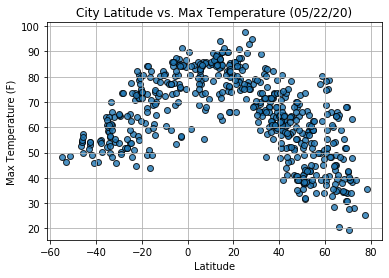

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
#This plot shows us what we may have expected, that the closer the latitude is to 0 or the equator, the higher the max temperatures are.

## Latitude vs. Humidity Plot

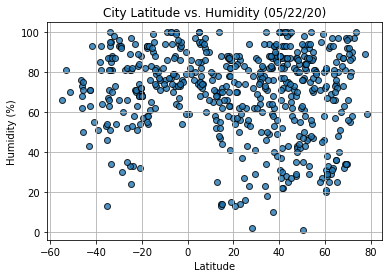

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
# This plot does not show us much of a pattern from what I can tell. I would predict there is no correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

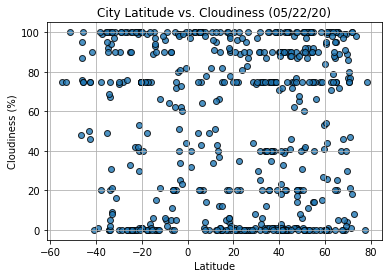

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [ ]:
# There are a lot of cities that hover around either 100% or 0% cloudiness

## Latitude vs. Wind Speed Plot

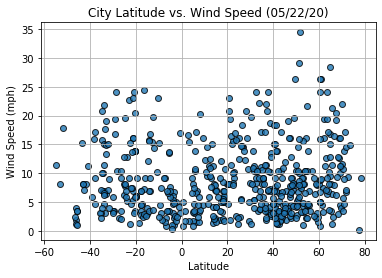

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

## Linear Regression

In [16]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

###  Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5967173751179076


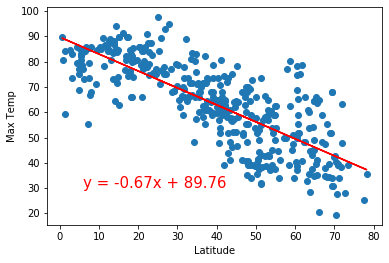

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

In [ ]:
#As expected, in the northern hemisphere, as the latitude increases the max temp decreases.

The r-squared is: 0.4814784398294991


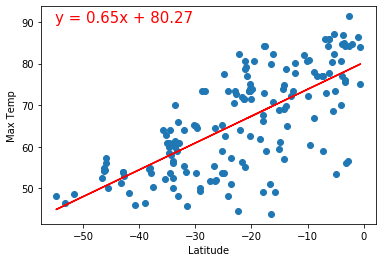

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

In [ ]:
#Also as expected, in the southern hemisphere, as the latitude gets closer to 0 (the equator) the temp also rises.

The high r value indicates a strong positive correlation between latitude and max temperature. R values ~ 0.5 indicate that there is a moderate positive correlation. 

### Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002925033130316854


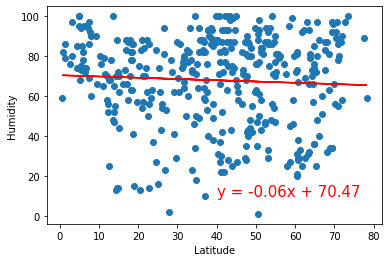

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

In [ ]:
# As we guessed above, there is not much of a pattern in the relationship between latitude and humidity.

The r-squared is: 0.05363820676330611


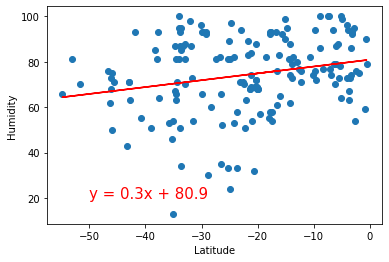

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

In [ ]:
# As we guessed above, there is not much of a pattern in the relationship between latitude and humidity.

### Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0025844901484244603


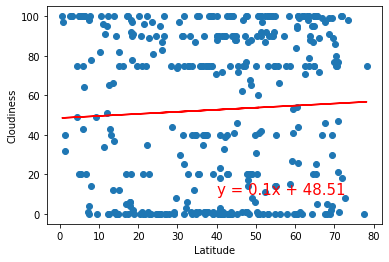

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-squared is: 0.01315699980331317


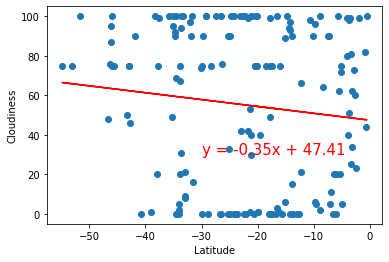

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The low r values indicate a weak positive relationship between latitude and cloudiness.

### Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.018253544394895745


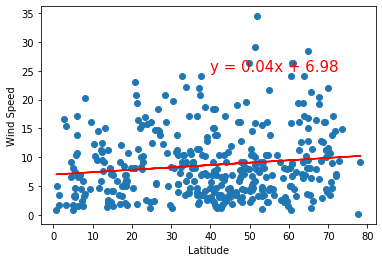

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-squared is: 0.021114492525440308


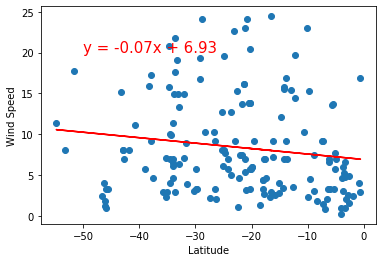

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))

The low r values indicate that there is no real relationship between wind speed and latitude." The difference between the hemispheres doesn't seem to be significant enough to comment upon.